### Guided Practices

Code to run during class sessions. This is included in the readme as well.

In [51]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics

df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)

## fit
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

## biased fit
lm = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.146724567058
0.148472886271


In [52]:
from sklearn import cross_validation
wd = '../../assets/dataset/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual

kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))

print np.mean(scores)

# this score will be lower, but we're trading off bias error for generalized error
lm = linear_model.LinearRegression().fit(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))

1673.3769513
1672.58110765


In [28]:
kf = cross_validation.KFold(len(modeldata), n_folds=5)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    
print np.mean(scores)

1780.97924083


In [4]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))
lm = linear_model.Lasso().fit(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))
lm = linear_model.Ridge().fit(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))

1672.58110765
1725.41581608
1672.60490113


In [5]:
alphas = np.logspace(-10, 10, 21)
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(modeldata))

Alpha: 1e-10
[ 112.68901765  -84.01121684  -24.68489063  -21.00314493  -21.71893628]
1672.58110765
Alpha: 1e-09
[ 112.68901765  -84.01121684  -24.68489061  -21.00314491  -21.71893626]
1672.58110765
Alpha: 1e-08
[ 112.68901765  -84.01121684  -24.6848904   -21.00314471  -21.71893606]
1672.58110765
Alpha: 1e-07
[ 112.68901763  -84.01121682  -24.68488837  -21.00314268  -21.71893403]
1672.58110765
Alpha: 1e-06
[ 112.68901745  -84.01121667  -24.68486804  -21.00312237  -21.71891373]
1672.58110765
Alpha: 1e-05
[ 112.68901562  -84.01121509  -24.68466472  -21.00291929  -21.71871079]
1672.58110765
Alpha: 0.0001
[ 112.68899732  -84.01119938  -24.68263174  -21.00088873  -21.71668162]
1672.58110765
Alpha: 0.001
[ 112.68881437  -84.01104228  -24.66232204  -20.98060316  -21.69640993]
1672.58110774
Alpha: 0.01
[ 112.68698753  -84.00947323  -24.46121539  -20.77973778  -21.49568404]
1672.58111645
Alpha: 0.1
[ 112.66896732  -83.99396383  -22.63109556  -18.95202277  -19.66942371]
1672.58185208
Alpha: 1.0
[

In [6]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(modeldata, y)

print -gs.best_score_ # mean squared error here comes in negative, so let's make it positive.
print gs.best_estimator_ # explains which grid_search setup worked best
print gs.grid_scores_ # shows all the grid pairings and their performances.

1814.09369133
Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
[mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-10}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1.0000000000000001e-09}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-07}, mean: -1817.58711, std: 542.14317, params: {'alpha': 1.0000000000000001e-05}, mean: -1817.58707, std: 542.14331, params: {'alpha': 0.0001}, mean: -1817.58663, std: 542.14477, params: {'alpha': 0.001}, mean: -1817.58230, std: 542.15933, params: {'alpha': 0.01}, mean: -1817.54318, std: 542.30102, params: {'alpha': 0.10000000000000001}, mean: -1817.20111, std: 543.63587, params: {'alpha': 1.0}, mean: -1814.09369, std: 556.35563, params: {'alpha': 10.0}, mean: -1818.51694, std: 653.68607, params: 

In [7]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2
found better solution! using 0.2
6.0 is closest to 6.2


For the DP example below, it might be a great idea for students to take the code and implement a stopping point, similar to what n_iter would do in gradient descent.

There can be a great conversation about stopping early and still _kinda_ getting the right result vs taking a longer time to solve and having a more precise model.

That solution is below.

In [8]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
n_iter = 0
while not optimized:
    if n_iter > 3:
        print 'stopping iterations'
        break
    n_iter += 1
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
stopping iterations


In [8]:
lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print lm.score(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))

0.308440874262
1681.07383194


### Independent Practice Solution

This code shows the variety of challenges and some student gotchas. The plots will help showcase what should be learned.

1. With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
2. We know when to properly use l1 vs l2 regularization based on the data. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true?
    * (if it didn't look like it, did gradient descent have enough iterations?)
3. How do results change when you alter the learning rate (power_t)?

In [53]:
%matplotlib inline
import matplotlib

In [56]:
alphas = np.logspace(-10, -1, 100)
print alphas
params = {'alpha':alphas, } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid.parameters = grid.parameters.apply(lambda x: x['alpha'])
grid.mean_validation_score = grid.mean_validation_score.apply(lambda x: -x)
grid.columns = ['alpha', 'mean_squared_error', 'cv']


print -gs.best_score_
gs.best_estimator_


[  1.00000000e-10   1.23284674e-10   1.51991108e-10   1.87381742e-10
   2.31012970e-10   2.84803587e-10   3.51119173e-10   4.32876128e-10
   5.33669923e-10   6.57933225e-10   8.11130831e-10   1.00000000e-09
   1.23284674e-09   1.51991108e-09   1.87381742e-09   2.31012970e-09
   2.84803587e-09   3.51119173e-09   4.32876128e-09   5.33669923e-09
   6.57933225e-09   8.11130831e-09   1.00000000e-08   1.23284674e-08
   1.51991108e-08   1.87381742e-08   2.31012970e-08   2.84803587e-08
   3.51119173e-08   4.32876128e-08   5.33669923e-08   6.57933225e-08
   8.11130831e-08   1.00000000e-07   1.23284674e-07   1.51991108e-07
   1.87381742e-07   2.31012970e-07   2.84803587e-07   3.51119173e-07
   4.32876128e-07   5.33669923e-07   6.57933225e-07   8.11130831e-07
   1.00000000e-06   1.23284674e-06   1.51991108e-06   1.87381742e-06
   2.31012970e-06   2.84803587e-06   3.51119173e-06   4.32876128e-06
   5.33669923e-06   6.57933225e-06   8.11130831e-06   1.00000000e-05
   1.23284674e-05   1.51991108e-05

SGDRegressor(alpha=6.5793322465756827e-06, average=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', n_iter=5,
       penalty='l2', power_t=0.25, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

With the alphas available, it looks like at mean squared error stays generally flat with incredibly small alpha values, but starting at $10^{-3}$, the error begins to elbow. We probably don't have much of a different in performance with other alpha values. 

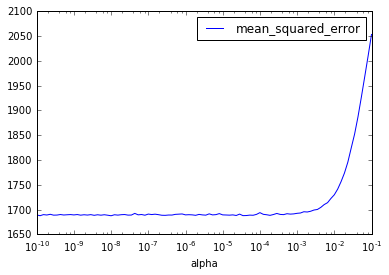

In [55]:
grid.plot('alpha', 'mean_squared_error', logx=True)

At alpha values of either .1 or 1, the l1_ratio works best closer to 1! Interesting. At other values of alpha they should see similar results, though the graphs aren't as clear.

In [57]:
l1_2_ratios = [float(i) / 100 for i in range(0, 101, 1)]
print l1_2_ratios
params = {'l1_ratio':l1_2_ratios, 'penalty': ['elasticnet'], 'alpha': [.1], 'n_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid.parameters = grid.parameters.apply(lambda x: x['l1_ratio'])
grid.mean_validation_score = grid.mean_validation_score.apply(lambda x: -x)
grid.columns = ['l1_ratio', 'mean_squared_error', 'cv']
    

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


In [58]:
print -gs.best_score_
gs.best_estimator_

1674.52849945


SGDRegressor(alpha=0.1, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=1.0, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty='elasticnet', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

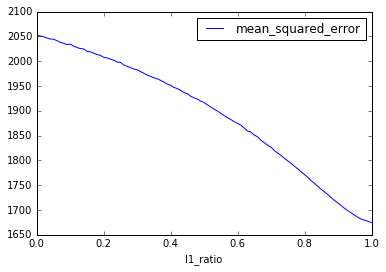

In [59]:
grid.plot('l1_ratio', 'mean_squared_error')

In [60]:
learning = range(1, 100)
print learning
params = {'eta0':learning, 'n_iter': [100]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid.parameters = grid.parameters.apply(lambda x:x['eta0'])
grid.mean_validation_score = grid.mean_validation_score.apply(lambda x: -x)
grid.columns = ['eta0', 'mean_squared_error', 'cv']
    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


Here it should be apparent that as the initial learning rate increases, the error should _also_ increase. And what happens when the initial learning rate is too high? A dramatic increase in error. Students should recognize the importance of learning rate and what values it should be set at, the smaller generally the better.

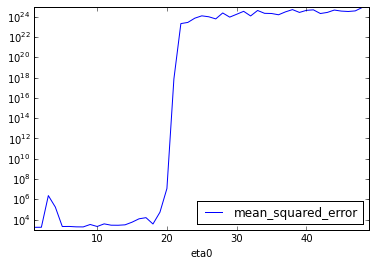

In [17]:
print -gs.best_score_
gs.best_estimator_
grid.plot('eta0', 'mean_squared_error', logy=True)